In [1]:
#https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

#Data: http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data
    
# Time Based Learning Rate Decay
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

def create_model():
    # load dataset
    dataframe = read_csv("data/ionosphere.csv", header=None)
    dataset = dataframe.values

    # split into input (X) and output (Y) variables
    X = dataset[:,0:34].astype(float)
    Y = dataset[:,34]

    # encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(Y)
    Y = encoder.transform(Y)

    # create model
    model = Sequential()
    model.add(Dense(34, input_dim=34, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model,X,Y


In [2]:
model,X,y = create_model()
# Compile model
epochs = 50
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=0)

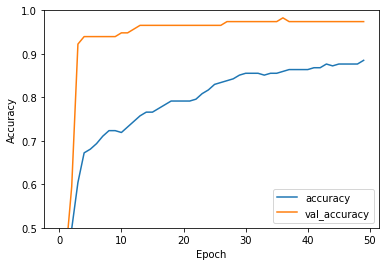

In [3]:
from matplotlib import pyplot as plt
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

plot_history(history)

# Early stopping

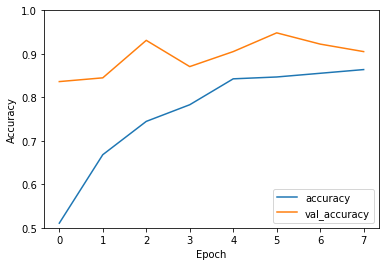

In [4]:
model,X,y = create_model()
# Compile model
learning_rate = 0.1
sgd = SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X, y, validation_split=0.33, epochs=epochs, batch_size=28, callbacks=[callback], verbose=0)
plot_history(history)

# Learning Rate

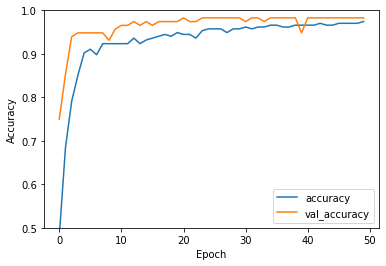

In [5]:
model,X,y = create_model()
# Compile model
learning_rate = 0.1
sgd = SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=0)
plot_history(history)